In [1]:
%matplotlib inline

# About this tutorial
This is a quick refresher on how neuroimaging data is represented and stored in python.

# 3D and 4D niimgs: handling and visualizing

In python, volume data is represented in a common format called "nifty" format. It has the extension `.nii` or `.nii.gz`. There are many packages for deadling with this format in python, though the most common is called `nibabel`.

Here we'll cover how to work with 3D and 4D niimgs, with a focus on the following topics:

* Loading neuroimaging data from disk
* Accessing the raw data and its properties
* Doing some simple visualizations of the data (in 3D and over time)

Downloading tutorial datasets from Internet
--------------------------------------------

Nilearn comes with functions that download public data from Internet

Let's first check where the data is downloaded on our disk:



In [1]:
from nilearn import datasets
import nibabel as nb
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['/Users/choldgraf/nilearn_data']


We can also represent things like statistical maps using nify files (since these are just some statistic represented at each voxel in the volums). Let's now retrieve a motor contrast from a localizer experiment



In [2]:
tmap_filenames = datasets.fetch_localizer_button_task()['tmaps']
print(tmap_filenames)

['/Users/choldgraf/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz']


tmap_filenames is a list of filenames. We need to take the first one



In [3]:
tmap_filename = tmap_filenames[0]

# Loading a raw 3d file
Volume files are generally represented in "nifty" format in python. These are easy to read with the `nibabel` package.

In [4]:
brain = nb.load(tmap_filename)

If you look inside `brain`, you'll find a number of methods and attributes in python that let you do different things with it. For example, we could return the transformation matrix to switch coordinate spaces:

In [6]:
brain.affine

array([[  -3.,    0.,    0.,   78.],
       [   0.,    3.,    0., -111.],
       [   0.,    0.,    3.,  -51.],
       [   0.,    0.,    0.,    1.]])

However, here we will focus on the raw data itslef. The data for this volume is stored in the object, and we can access it as a numpy array:

In [7]:
brain.get_data()[:2]

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32)

In [8]:
# This is the dimensionality of the volume
brain.get_data().shape

(53, 63, 46)

With `nilearn`, we can do some quick plotting simply by pointing to the file name. That way we don't have to load in the data manually.

# Visualizing a 3D file

The file contains a 3D volume, we can easily visualize it as a
statistical map. `nilearn` has a number of functions for visualizing neuroimaging maps. These will generally take either a nifti object, or a file path to a nifti object.

In [17]:
from nilearn import plotting

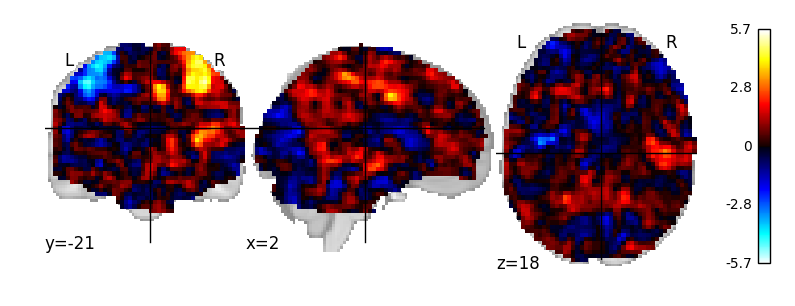

In [20]:
# Here we'll load the nifty object according to the statistical map
tmap = nb.load(tmap_filename)

# Then plot it
plotting.plot_stat_map(tmap)

# Alternatively, we could simply point it to the filename
# plotting.plot_stat_map(tmap_filename)

We can also do simple manipulations of the visualization, such as applying a threshold:

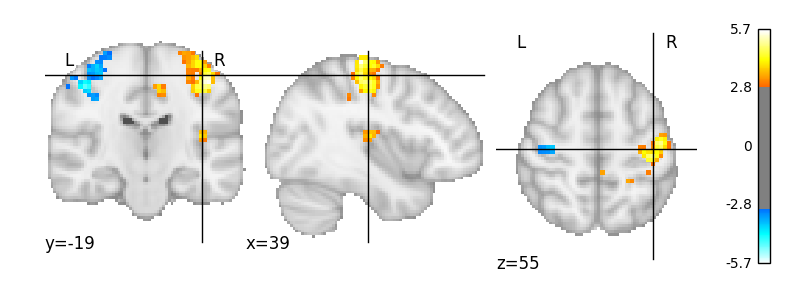

In [21]:
plotting.plot_stat_map(tmap_filename, threshold=3)

# Visualizing one volume in a 4D file

Finally, for those of us doing *functional* neuroimaging, we have another dimension to care about: time.

Fortunately nifti files (and `nilearn`) are designed with time in mind. As an example, we'll download resting-state networks from the Smith 2009 study on correspondance between rest and task



In [22]:
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
print(rsn)

/Users/choldgraf/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz


Nilearn has its own I/O functionality as well, which we'll show below. We'll load in this file, which is a 4D nifti file. We load it into the memory to print its shape.



In [24]:
from nilearn import image
print(image.load_img(rsn).shape)

(91, 109, 91, 10)


We can also retrieve the first volume, which corresponds to the first sample in this dataset (note that Python indexing starts at 0):

In [26]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


first_rsn is a 3D image.

We can then plot it



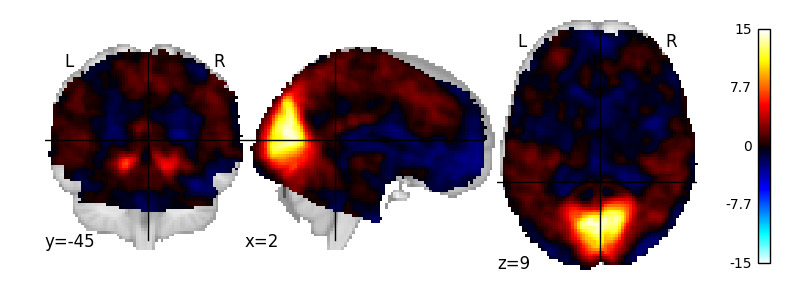

In [27]:
plotting.plot_stat_map(first_rsn)

Looping on all volumes in a 4D file
-----------------------------------

If we want to plot all the volumes in this 4D file, we can use iter_img
to loop on them.

Then we give a few arguments to plot_stat_map in order to have a more
compact display.



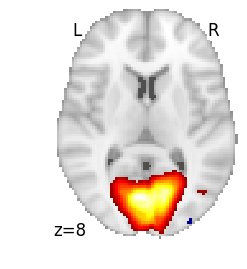

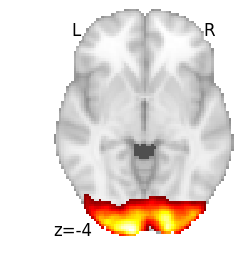

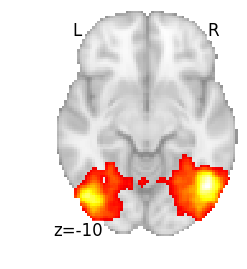

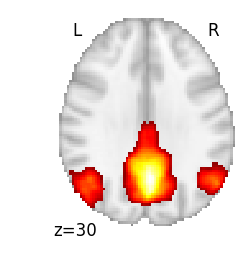

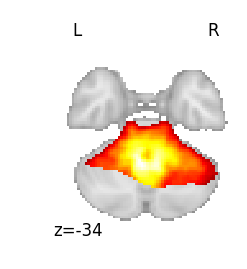

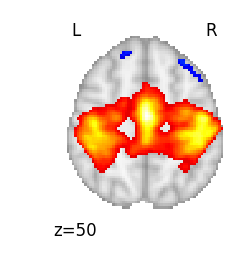

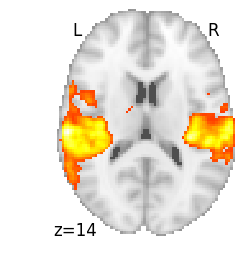

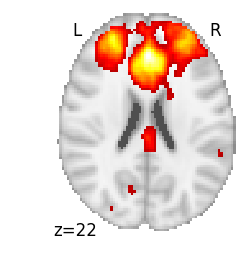

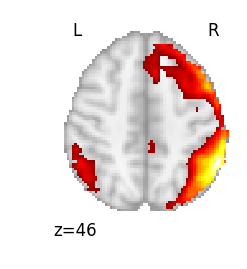

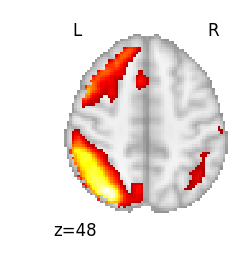

In [28]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=3, display_mode="z", cut_coords=1,
                           colorbar=False)

---
# Recap
To recap, neuroimaging images (niimgs as we call them) come in
different flavors:

* 3D images, containing only one brain volume
* 4D images, containing multiple brain volumes.

More details about the input formats in nilearn for 3D and 4D images is
given in the documentation section: `loading_data`.

Functions accept either 3D or 4D images, and we need to use on the one
hand `nilearn.image.index_img` or :func:`nilearn.image.iter_img`
to break down 4D images into 3D images, and on the other hand
`nilearn.image.concat_imgs` to group a list of 3D images into a 4D
image.

